### Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
In this project,we are going to build a model for detecting fradulent credit card activities. Using a dataset of of nearly 284,807 credit card transactions and multiple unsupervised anomaly detection algorithms, we are going to identify transactions with a high probability of being credit card fraud. We will build and deploy the following two machine learning algorithms:
- Local Outlier Factor (LOF)
- Isolation Forest Algorithm

### Dataset

The data fort his project can be downloaded from kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data cannot be provided.Therfore, the features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


        

##### Loading and Exploring the Dataset

In [1]:
#importing necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.getcwd() + '\creditcard.csv'
path

'C:\\Users\\Samreen\\Documents\\ML Projects\\creditcard.csv'

In [3]:
df = pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.value_counts(df['Class'])

Class
0    284315
1       492
dtype: int64

**There is a small portion of transactions that are fradulent. Therefore our data is imbalanced.**

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Mean of class is close to 0, which means most transcations are not anomalous as expected.**

In [8]:
#taking only some portion of dataset as it is very large to ease computations.

df = df.sample(frac = 0.1, random_state=0) 
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240010,150386.0,0.007960,0.982459,-0.946626,0.109543,0.499675,-0.506735,0.457708,0.315438,0.091875,...,0.109535,0.426699,-0.120604,-0.830247,-0.387710,0.456957,-0.038764,0.024003,23.74,0
136625,81797.0,1.230272,0.040777,0.417307,0.036078,-0.575588,-0.915976,-0.053631,-0.142796,-0.169655,...,0.090077,0.274945,-0.043928,0.628737,0.338991,1.038613,-0.085763,-0.005397,8.05,0
273822,165713.0,1.961683,0.103751,-1.654364,0.374108,0.453658,-0.646808,0.192976,-0.161455,0.076371,...,-0.277479,-0.753039,0.311993,0.687986,-0.293237,0.136416,-0.064752,-0.029508,31.35,0
137627,82253.0,1.025261,-1.248304,0.180253,-0.586194,-1.255391,-0.636499,-0.450901,-0.145905,-0.537023,...,0.191897,-0.053536,-0.220630,-0.121752,0.321485,-0.271312,-0.030492,0.051395,222.00,0


In [9]:
df.shape

(28481, 31)

In [10]:
df.value_counts(df['Class'])

Class
0    28426
1       55
dtype: int64

#### Visualizations

In [11]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

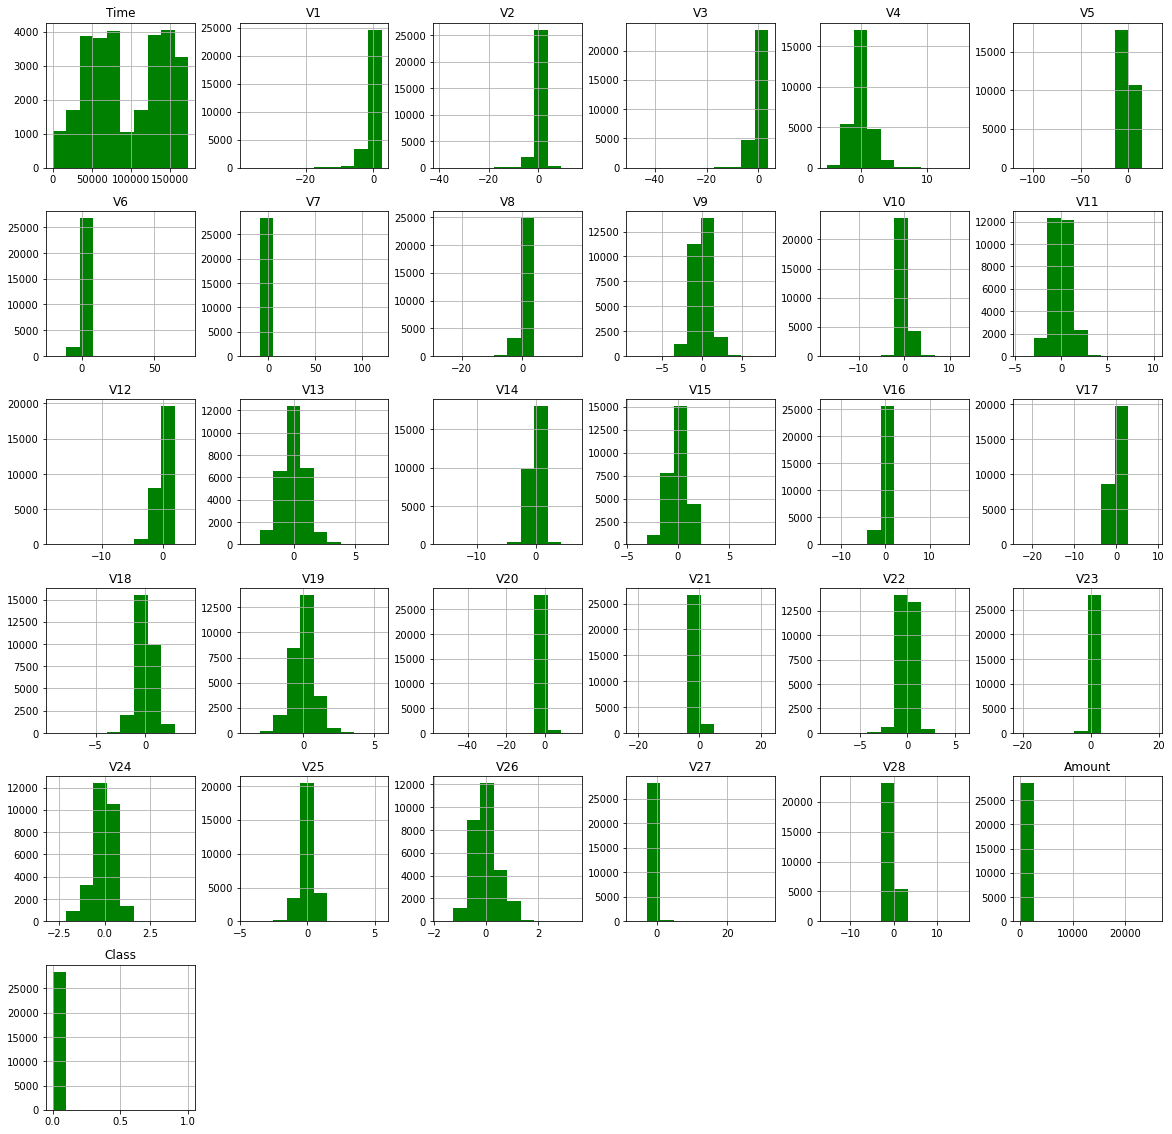

In [12]:
#plotting histogram

df.hist(figsize = (20,20),color='green')
plt.show()

**From the historgrams, we can see not all features have gaussian distribution. For e.g time,V20 etc.**

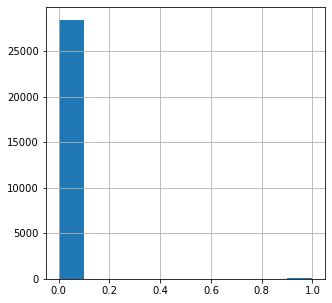

In [13]:
df['Class'].hist(figsize=(5,5))
plt.show()

<AxesSubplot:xlabel='Time', ylabel='Amount'>

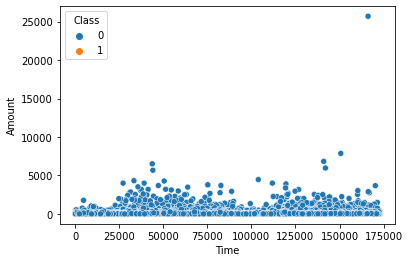

In [14]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df)

In [15]:
fraud = df[df['Class']==1]
valid = df[df['Class']==0]

In [16]:
print('The number of fraud and valid transactions are {} and {} respectively'.format(len(fraud),len(valid)))

The number of fraud and valid transactions are 55 and 28426 respectively


In [17]:
outlier_frac = len(fraud) / float(len(valid)) 
outlier_frac

0.0019348483782452685

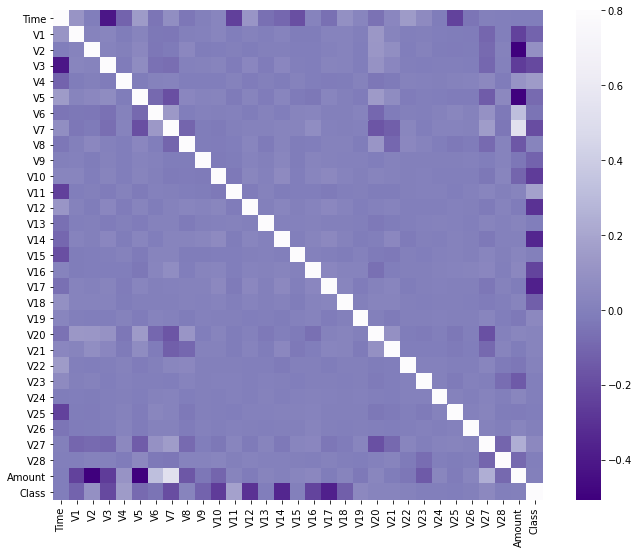

In [18]:
# plotting the correlation matrix

corr_mat = df.corr()  
plt.figure(figsize = (12, 9))
sns.heatmap(corr_mat, vmax = .8, square = True,cmap='Purples_r')
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V7 and Amount.

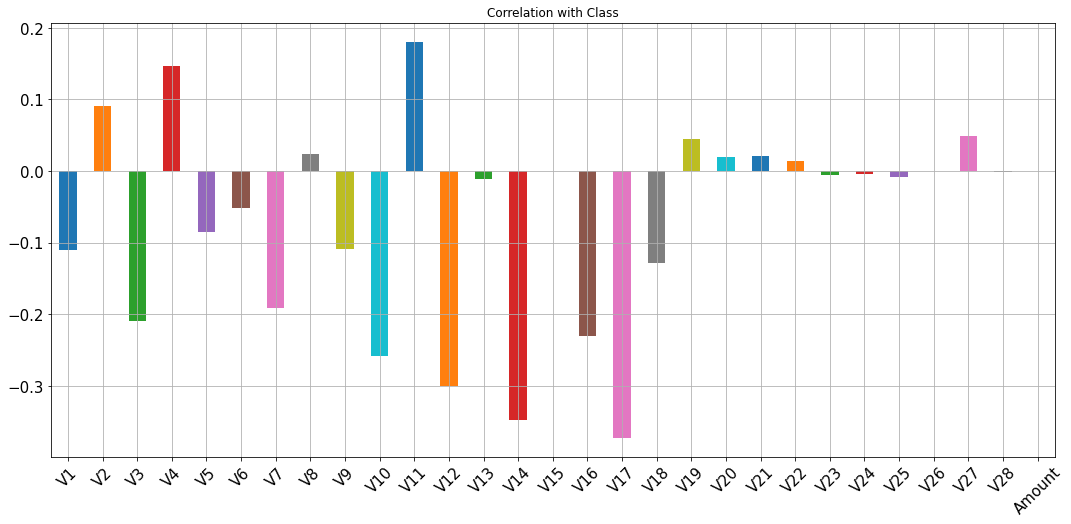

In [19]:
## Correlation with Response Variable 
df1= df.drop(columns = ["Class", "Time"])
df1.corrwith(df.Class).plot.bar(figsize=(18,8),
              title = "Correlation with Class",
              fontsize = 15, rot = 45,
              grid = True,
              color=colors);


Since this is an unsupervised ML algorithm, we don't want the class labels to be fed into our model. 

In [20]:
columns = df.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
X = df.drop('Class',axis=1) # to remove class column
y = df['Class']   #setting the target variable

In [22]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [23]:
X.shape

(28481, 30)

In [24]:
y.shape

(28481,)

### Models

We will use the following techniques:

**Local Outlier Factor (LOF):**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

**Isolation Forest Algorithm:**
Isolation forest is a machine learning algorithm for anomaly detection. It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.
The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies. (*A normal point is difficult to isolate than an outlier. Therefore the anomalous points will be isolated sooner*)

In [25]:
#importing necessary libraries

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [26]:
#building the two classifiers

classifiers = {'Isolation Forest': IsolationForest(max_samples=len(X),contamination=outlier_frac, random_state=0),
               
               'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20,contamination = outlier_frac)
                   
              }

In [27]:
#fitting the models
n_outliers = len(fraud)

for i,(name,clf) in enumerate(classifiers.items()):
    if name=='Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
        
        # when LOF is used for outlier detection, the estimator has no predict,decision_function methods.
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)  # large values correspond to inliers.
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))
    

Isolation Forest: 69
0.9975773322565921
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.38      0.38      0.38        55

    accuracy                           1.00     28481
   macro avg       0.69      0.69      0.69     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 109
0.9961728871879498
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.02      0.02      0.02        55

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



**Note**: 
*negative_outlier factor*: The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.
The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

*decision_fucntion*: Average anomaly score of X of the base classifiers.
The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.
The measure of normality of an observation given a tree is the depth of the leaf containing this observation, which is equivalent to the number of splittings required to isolate this point. In case of several observations n_left in the leaf, the average path length of a n_left samples isolation tree is added.

### Conclusion

Isolation Forest does better at detecting outliers. In iforest,  38% of frauds are predicted correctly.In LOF only 2% of frauds are predicted correctly.

The accuracy scores for both the models are high. However, from the number of errors in the predictions for both the models seem high too implying the contrary. This is because majority population of the transactions are valid thereby making the accuracy which is the sum of both true positives and true negatives over the total data points, a biased metric. In such cases, precision and the F1 score give a better measure of the performance of a model. 
While 38% precise model is not a great model but of the two models isolation forest model performs the best.